In [7]:
import random

def tournament_sort(elements, K, compare_func):
    """
    elements: ソート対象の要素リスト
    K: 上位K件を取得
    compare_func: ユーザ定義の比較関数
    """
    while len(elements) > K:
        next_round = []
        losers = []
        for i in range(0, len(elements), 2):
            print(i, next_round, losers)
            if i + 1 < len(elements):
                winner, loser = elements[i], elements[i+1]
                if compare_func(winner, loser) > 0:
                    winner, loser = loser, winner
                next_round.append(winner)
                losers.append(loser)
            else:
                next_round.append(elements[i])
        elements = next_round
    return elements

# サンプルデータ
songs = [f"Song {i}" for i in range(20)]
# random.shuffle(songs)

# ユーザ定義の比較関数（デモとしてランダム比較）
def user_defined_compare(song1, song2):
    # ret = random.choice([-1, 1])
    ret = 1
    print(song1, song2, ret)
    return ret

# 上位K件のソート
K = 5
top_k_songs = tournament_sort(songs, K, user_defined_compare)
print(f"Top {K} songs: {top_k_songs}")


0 [] []
Song 0 Song 1 1
2 ['Song 1'] ['Song 0']
Song 2 Song 3 1
4 ['Song 1', 'Song 3'] ['Song 0', 'Song 2']
Song 4 Song 5 1
6 ['Song 1', 'Song 3', 'Song 5'] ['Song 0', 'Song 2', 'Song 4']
Song 6 Song 7 1
8 ['Song 1', 'Song 3', 'Song 5', 'Song 7'] ['Song 0', 'Song 2', 'Song 4', 'Song 6']
Song 8 Song 9 1
10 ['Song 1', 'Song 3', 'Song 5', 'Song 7', 'Song 9'] ['Song 0', 'Song 2', 'Song 4', 'Song 6', 'Song 8']
Song 10 Song 11 1
12 ['Song 1', 'Song 3', 'Song 5', 'Song 7', 'Song 9', 'Song 11'] ['Song 0', 'Song 2', 'Song 4', 'Song 6', 'Song 8', 'Song 10']
Song 12 Song 13 1
14 ['Song 1', 'Song 3', 'Song 5', 'Song 7', 'Song 9', 'Song 11', 'Song 13'] ['Song 0', 'Song 2', 'Song 4', 'Song 6', 'Song 8', 'Song 10', 'Song 12']
Song 14 Song 15 1
16 ['Song 1', 'Song 3', 'Song 5', 'Song 7', 'Song 9', 'Song 11', 'Song 13', 'Song 15'] ['Song 0', 'Song 2', 'Song 4', 'Song 6', 'Song 8', 'Song 10', 'Song 12', 'Song 14']
Song 16 Song 17 1
18 ['Song 1', 'Song 3', 'Song 5', 'Song 7', 'Song 9', 'Song 11', 'Song 1

In [ ]:
import random

def quickselect(arr, left, right, K, compare_func):
    if left == right:
        return arr[:K]
    
    pivot_index = random.randint(left, right)
    pivot_index = partition(arr, left, right, pivot_index, compare_func)
    
    # ピボットがKと一致する場合、上位K個が決定
    if K == pivot_index:
        return arr[:K]
    elif K < pivot_index:
        return quickselect(arr, left, pivot_index - 1, K, compare_func)
    else:
        return quickselect(arr, pivot_index + 1, right, K, compare_func)

def partition(arr, left, right, pivot_index, compare_func):
    pivot_value = arr[pivot_index]
    arr[pivot_index], arr[right] = arr[right], arr[pivot_index]
    store_index = left
    for i in range(left, right):
        if compare_func(arr[i], pivot_value) < 0:
            arr[store_index], arr[i] = arr[i], arr[store_index]
            store_index += 1
    arr[right], arr[store_index] = arr[store_index], arr[right]
    return store_index

def partial_sort(arr, K, compare_func):
    # 上位K件を選別
    top_k = quickselect(arr, 0, len(arr) - 1, K, compare_func)
    # 上位K件をソート
    return sorted(top_k, key=lambda x: x, cmp=compare_func)

# サンプルデータ
songs = [f"Song {i}" for i in range(20)]
random.shuffle(songs)

# ユーザ定義の比較関数（デモとしてランダム比較）
def user_defined_compare(song1, song2):
    # ここでは簡単に辞書順で比較
    return (song1 > song2) - (song1 < song2)

# 上位K件のソート
K = 5
top_k_sorted_songs = partial_sort(songs, K, user_defined_compare)
print(f"Top {K} sorted songs: {top_k_sorted_songs}")


In [53]:
import random
from math import log2, ceil

global cnt
cnt = 0

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

def user_preference(char1, char2):
    # この関数は実際のユーザー入力の代わりにランダムな選択をシミュレートします
    # return random.choice([True, False])
    global cnt
    cnt += 1
    if char1 is None:
        return False
    elif char2 is None:
        return True
    else:
        return char1<char2

def build_tournament_tree(characters):
    nodes = [Node(char) for char in characters]
    while len(nodes) > 1:
        parents = []
        for i in range(0, len(nodes), 2):
            if i + 1 < len(nodes):
                parent = Node(None)
                if user_preference(nodes[i].value, nodes[i+1].value):
                    parent.value = nodes[i].value
                else:
                    parent.value = nodes[i+1].value
                parent.left = nodes[i]
                parent.right = nodes[i+1]
                nodes[i].parent = parent
                nodes[i+1].parent = parent
                parents.append(parent)
            else:
                parents.append(nodes[i])
        nodes = parents
    return nodes[0]

def update_tree(node):
    while node:
        if node.left and node.right:
            if user_preference(node.left.value, node.right.value):
                node.value = node.left.value
            else:
                node.value = node.right.value
        elif node.left:
            node.value = node.left.value
        elif node.right:
            node.value = node.right.value
        node = node.parent

def character_sort(characters, k):
    root = build_tournament_tree(characters)
    sorted_chars = []
    comparisons = (len(characters) - 1)  # 初期木構築の比較回数

    for _ in range(k):
        sorted_chars.append(root.value)
        node = root
        print(f"root: {node.value}")
        print_tree(root)
        while node.left or node.right:
            print(f"子ノードをたどる：{node.value, node.left.value, node.right.value}")
            if not node.left or (node.right and user_preference(node.right.value, node.left.value)):
                node.value = node.right.value
                node = node.right
            else:
                node.value = node.left.value
                node = node.left
            comparisons += 1
        node.value = None
        update_tree(node.parent)
        comparisons += ceil(log2(len(characters))) - 1  # 木の更新の比較回数

    return sorted_chars, comparisons

def print_tree(root):
    Nodes = [root]
    while Nodes:
        [print(n.value, end=' ') for n in Nodes]
        print()
        News = []
        for n in Nodes:
            if n.left is not None:
                News.append(n.left)
            if n.right is not None:
                News.append(n.right)
        Nodes = News


N = 30
K = 30

# テスト用のキャラクターリスト
characters = [f"キャラ{i}" for i in range(1, N+1)]
# random.shuffle(characters)

# パラメータ設定
# N = len(characters)
# K = 5

print(f"元のリスト（先頭10件）: {characters[:10]}")
sorted_chars, comp_count = character_sort(characters, K)
print(f"\n上位{K}件のソート結果: {sorted_chars}")
print(f"比較回数: {comp_count}")
print(f"理論的な比較回数の上限: {N - 1 + K * ceil(log2(N))}")
print(f"実際のカウント: {cnt}")

元のリスト（先頭10件）: ['キャラ1', 'キャラ2', 'キャラ3', 'キャラ4', 'キャラ5', 'キャラ6', 'キャラ7', 'キャラ8', 'キャラ9', 'キャラ10']
root: キャラ1
キャラ1 
キャラ1 キャラ17 
キャラ1 キャラ10 キャラ17 キャラ25 
キャラ1 キャラ5 キャラ10 キャラ13 キャラ17 キャラ21 キャラ25 キャラ29 
キャラ1 キャラ3 キャラ5 キャラ7 キャラ10 キャラ11 キャラ13 キャラ15 キャラ17 キャラ19 キャラ21 キャラ23 キャラ25 キャラ27 キャラ29 キャラ30 
キャラ1 キャラ2 キャラ3 キャラ4 キャラ5 キャラ6 キャラ7 キャラ8 キャラ9 キャラ10 キャラ11 キャラ12 キャラ13 キャラ14 キャラ15 キャラ16 キャラ17 キャラ18 キャラ19 キャラ20 キャラ21 キャラ22 キャラ23 キャラ24 キャラ25 キャラ26 キャラ27 キャラ28 
子ノードをたどる：('キャラ1', 'キャラ1', 'キャラ17')
子ノードをたどる：('キャラ1', 'キャラ1', 'キャラ10')
子ノードをたどる：('キャラ1', 'キャラ1', 'キャラ5')
子ノードをたどる：('キャラ1', 'キャラ1', 'キャラ3')
子ノードをたどる：('キャラ1', 'キャラ1', 'キャラ2')
root: キャラ10
キャラ10 
キャラ10 キャラ17 
キャラ2 キャラ10 キャラ17 キャラ25 
キャラ2 キャラ5 キャラ10 キャラ13 キャラ17 キャラ21 キャラ25 キャラ29 
キャラ2 キャラ3 キャラ5 キャラ7 キャラ10 キャラ11 キャラ13 キャラ15 キャラ17 キャラ19 キャラ21 キャラ23 キャラ25 キャラ27 キャラ29 キャラ30 
None キャラ2 キャラ3 キャラ4 キャラ5 キャラ6 キャラ7 キャラ8 キャラ9 キャラ10 キャラ11 キャラ12 キャラ13 キャラ14 キャラ15 キャラ16 キャラ17 キャラ18 キャラ19 キャラ20 キャラ21 キャラ22 キャラ23 キャラ24 キャラ25 キャラ26 キャラ27 キャラ28 
子ノードをたどる：('キャラ10', 'キャラ

In [54]:
import random

cnt_pq=0

def partition(arr, low, high, pivot_index, compare_func):
    pivot_value = arr[pivot_index]
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    store_index = low
    for i in range(low, high):
        if compare_func(arr[i], pivot_value) < 0:
            arr[store_index], arr[i] = arr[i], arr[store_index]
            store_index += 1
    arr[store_index], arr[high] = arr[high], arr[store_index]
    return store_index

def partial_quicksort(arr, low, high, k, compare_func):
    if low < high:
        pivot_index = random.randint(low, high)
        pivot_index = partition(arr, low, high, pivot_index, compare_func)

        # 部分クイックソートを左側に適用
        partial_quicksort(arr, low, pivot_index - 1, k, compare_func)
        
        # ピボット位置がk未満の場合、右側を再帰的にソート
        if pivot_index < k - 1:
            partial_quicksort(arr, pivot_index + 1, high, k, compare_func)

def user_defined_compare(song1, song2):
    # 辞書順で比較（昇順）
    global cnt_pq
    cnt_pq += 1
    return (song1 > song2) - (song1 < song2)


print(f"元のリスト（先頭10件）: {characters[:10]}")

partial_quicksort(characters, 0, len(characters) - 1, K, user_defined_compare)
print(f"\n上位{K}件のソート結果: {characters}")
# print(f"比較回数: {comp_count}")
# print(f"理論的な比較回数の上限: {N - 1 + K * ceil(log2(N))}")
print(f"実際のカウント: {cnt_pq}")

元のリスト（先頭10件）: ['キャラ1', 'キャラ2', 'キャラ3', 'キャラ4', 'キャラ5', 'キャラ6', 'キャラ7', 'キャラ8', 'キャラ9', 'キャラ10']

上位30件のソート結果: ['キャラ1', 'キャラ10', 'キャラ11', 'キャラ12', 'キャラ13', 'キャラ14', 'キャラ15', 'キャラ16', 'キャラ17', 'キャラ18', 'キャラ19', 'キャラ2', 'キャラ20', 'キャラ21', 'キャラ22', 'キャラ23', 'キャラ24', 'キャラ25', 'キャラ26', 'キャラ27', 'キャラ28', 'キャラ29', 'キャラ3', 'キャラ30', 'キャラ4', 'キャラ5', 'キャラ6', 'キャラ7', 'キャラ8', 'キャラ9']
実際のカウント: 146


In [50]:
cnt_mi = 0

def user_defined_compare(x, y):
    # ユーザによる判断に基づく比較関数
    # xがyよりも小さい場合は -1 を返す
    # xがyよりも大きい場合は 1 を返す
    # xとyが等しい場合は 0 を返す
    global cnt_mi
    cnt_mi += 1
    if x < y:
        return -1
    elif x > y:
        return 1
    else:
        return 0

def merge_insertion_sort(collection, compare_func):
    if len(collection) <= 1:
        return collection

    def binary_search_insertion(sorted_list, item):
        left = 0
        right = len(sorted_list) - 1
        while left <= right:
            middle = (left + right) // 2
            if left == right:
                if compare_func(sorted_list[middle], item) < 0:
                    left = middle + 1
                break
            elif compare_func(sorted_list[middle], item) < 0:
                left = middle + 1
            else:
                right = middle - 1
        sorted_list.insert(left, item)
        return sorted_list

    def merge(left, right):
        result = []
        while left and right:
            if compare_func(left[0][0], right[0][0]) < 0:
                result.append(left.pop(0))
            else:
                result.append(right.pop(0))
        return result + left + right

    def sortlist_2d(list_2d):
        length = len(list_2d)
        if length <= 1:
            return list_2d
        middle = length // 2
        return merge(sortlist_2d(list_2d[:middle]), sortlist_2d(list_2d[middle:]))

    two_paired_list = []
    has_last_odd_item = False
    for i in range(0, len(collection), 2):
        if i == len(collection) - 1:
            has_last_odd_item = True
        else:
            if compare_func(collection[i], collection[i + 1]) < 0:
                two_paired_list.append([collection[i], collection[i + 1]])
            else:
                two_paired_list.append([collection[i + 1], collection[i]])

    sorted_list_2d = sortlist_2d(two_paired_list)
    result = [i[0] for i in sorted_list_2d]
    result.append(sorted_list_2d[-1][1])

    if has_last_odd_item:
        pivot = collection[-1]
        result = binary_search_insertion(result, pivot)

    is_last_odd_item_inserted_before_this_index = False
    for i in range(len(sorted_list_2d) - 1):
        if result[i] == collection[-1] and has_last_odd_item:
            is_last_odd_item_inserted_before_this_index = True
        pivot = sorted_list_2d[i][1]
        if is_last_odd_item_inserted_before_this_index:
            result = result[: i + 2] + binary_search_insertion(result[i + 2:], pivot)
        else:
            result = result[: i + 1] + binary_search_insertion(result[i + 1:], pivot)

    return result


nums = []
cnts = []
for n in range(1,50):
    input_list = list(reversed(range(n)))
    cnt_mi = 0
    sorted_list = merge_insertion_sort(input_list, user_defined_compare)
    nums.append(n)    
    cnts.append(cnt_mi)



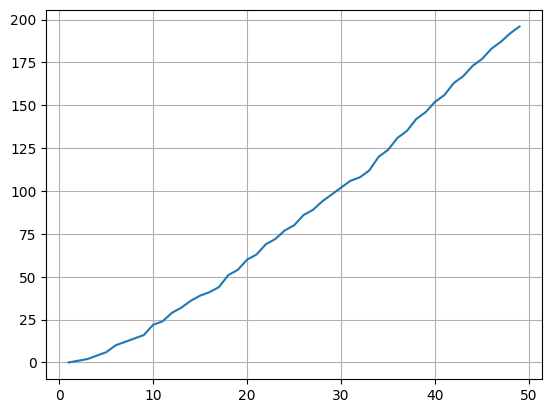

In [52]:
import matplotlib.pyplot as plt
plt.plot(nums, cnts)
plt.grid()